# SI 370: Correlation and Regression

Correlation does not imply causation!

![](https://github.com/umsi-data-science/si370/raw/master/resources/piratesvstemp.png)

http://mpastell.com/2013/04/19/python_regression/

## Wine quality redux
![](https://github.com/umsi-data-science/si370/raw/master/resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings. 
 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/winequality-red.csv')
wine.head()

Remember creating a pairplot for the wine dataset?

In [ ]:
sns.pairplot(wine,vars = ['fixed acidity','volatile acidity','pH','residual sugar'])

## Correlation

We can also look at the correlation between those variables.  From [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence):
> In the broadest sense correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other...
> Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.

Correlation coefficient can range from -1 to 1 and represent the degree to which and how
two variables are related.  Here's a visualization of a range of correlation coefficients:

![](https://github.com/umsi-data-science/si370/raw/master/resources/correlation1-1.png)

In [ ]:
# to calculate all possible correlation coefficients in a dataframe
wine.corr()

A heatmap is a really useful visualization technique for large correlation matrices:

In [ ]:
sns.heatmap(wine.corr())

We can also use a different type of color palette to highlight the differences:

In [ ]:
sns.heatmap(wine.corr(),cmap=sns.color_palette(" "))

Recall we used JointGrid to create a regplot and histplot on the same plot.  We can take a 
closer look at that now:

In [ ]:
wine.columns

In [ ]:
g = sns.JointGrid(data=wine,x='density',y='pH')
g = g.plot(sns.regplot, sns.histplot)

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [ ]:
model0 = smf.ols(" pH ~ density", data=wine).fit()
model0.summary()

In the above example, the $r^2$ value is 0.117, which means the model explains about 11.7% of the variance (which isn't great).  However, the model is statistically significant (the p-value, called "Prob (F-statistic)" in the output, is less than 0.05).
The estimates for the parameters of the model are also statistically significant, which means we can use the equation:

pH = -27.9515 * density + 31.1716

to predict the value of pH given a value for density.

What happens when the series name has a space (or other special character) in it?  Use the 'Q' function to "Quote" the name:

In [ ]:
model1 = smf.ols(" Q('fixed acidity') ~ density", data=wine).fit()
model1.summary()


.

## Outlier detection

"Outlier detection" refers to the identification of points that are extreme in value.  They may or may not influence the regression analysis.

Outlier: Large residual (i.e. big differences on the vertical dimension)

Leverage: Extreme value of predictor variable (i.e. big differences on the horizontal dimension)

Influence: Removing observation substantially changes estimate of coefficients


Consider the following cases, drawn from 

http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

In the first case, there are no notable points:

In [ ]:
np.random.seed(0) # seed the random number generator so we always get the same results
x1 = np.random.normal(20, 3, 20) # create a random normal distribution of 20 points, 
                                 # centered on 20, standard deviation of 20
y0 = 5 + 0.5 * x1 # create a corresponding y variable that is exactly 5 + 0.5 * x
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20) # create a corresponding y variable that is 5 + 0.5 * x 
                                               # plus some random noise drawn from a normal distribution
demo = pd.DataFrame({'x1':x1, 'y0':y0, 'y1':y1})
lm = sm.OLS(y1, sm.add_constant(x1)).fit()
lm1 = smf.ols(" y1 ~ x1", data=demo).fit()
print("The rsquared value is " + str(lm.rsquared))


In [ ]:

plt.scatter(np.sort(demo.x1), demo.y1[np.argsort(demo.x1)])
plt.scatter(np.mean(demo.x1), np.mean(demo.y1), color = "green")
plt.plot(np.sort(demo.x1), demo.y0[np.argsort(demo.x1)], label = "actual")
plt.plot(np.sort(demo.x1), lm.predict()[np.argsort(demo.x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

In [ ]:
# equivalently, without using DataFrames
plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.00005, ax = ax, criterion="cooks")

High leverage point, no outliers

In [ ]:
x2 = np.r_[x1, 30]
y2 = np.r_[y1, 20.8]
y20 = np.r_[y0, 20]

lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print("The rsquared value is " + str(lm2.rsquared))

plt.scatter(np.sort(x2), y2[np.argsort(x2)])
plt.scatter(30, 20.8, color = "red")
plt.scatter(np.mean(x2), np.mean(y2), color = "green")
plt.plot(np.sort(x2), y20[np.argsort(x2)], label = "actual")
plt.plot(np.sort(x2), lm2.predict()[np.argsort(x2)], label = "regression")
plt.legend()
plt.plot()


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, ax= ax, criterion="cooks")

Outlier, no leverage

In [ ]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print("The rsquared value is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

Outlier and leverage point

In [ ]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print("The rsquared value is " + str(lm4.rsquared))

plt.scatter(np.sort(x4), y4[np.argsort(x4)])
plt.scatter(30, 10, color = "red")
plt.scatter(np.mean(x4), np.mean(y4), color = "green")
plt.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
plt.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
plt.legend()
plt.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm4, ax= ax, criterion="cooks")

Let's look at Anscombe's Quartet:

/Users/cteplovs/Repos/si370fa23-student/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


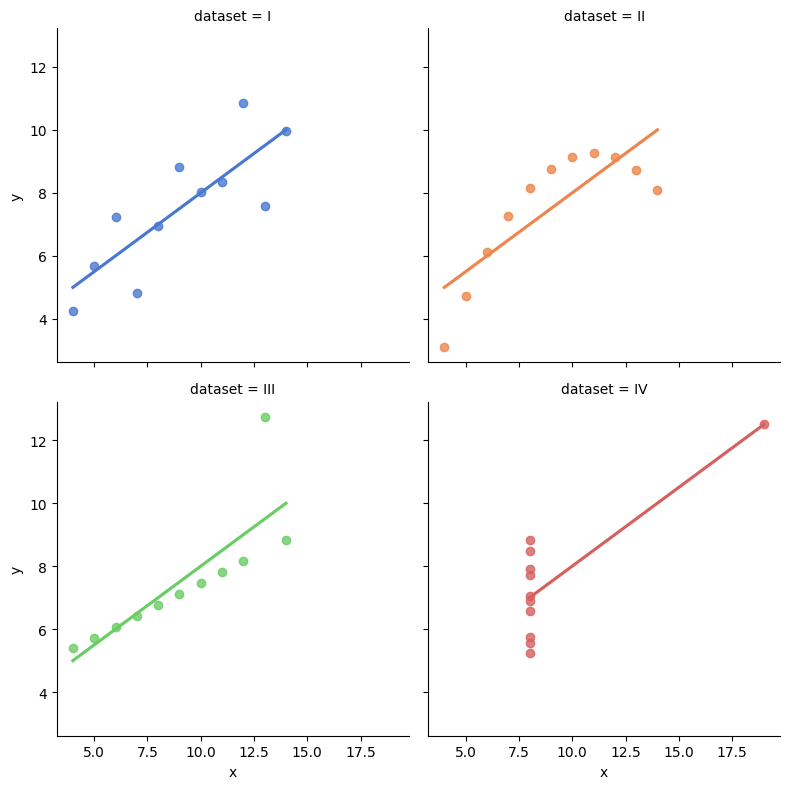

In [4]:
anscombe = sns.load_dataset("anscombe")


# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=0, palette="muted", height=4)

In [ ]:
anscombe.sample(10)


In [ ]:
anscombe_1 = anscombe[anscombe.dataset == 'I']
anscombe_2 = anscombe[anscombe.dataset == 'II']
anscombe_3 = anscombe[anscombe.dataset == 'III']
anscombe_4 = anscombe[anscombe.dataset == 'IV']

In [ ]:
anscombe_1_lm = smf.ols('y ~ x',anscombe_1).fit()
print("The rsquared value is " + str(anscombe_1_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_1_lm, ax= ax, criterion="cooks",alpha=0.05)
                                     
                                     

In [ ]:
anscombe_2_lm = smf.ols('y ~ x',anscombe_2).fit()
print("The rsquared value is " + str(anscombe_2_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_2_lm, ax= ax, criterion="cooks",alpha=.05)
                                     
                                     

In [ ]:
anscombe_3_lm = smf.ols('y ~ x',anscombe_3).fit()
print("The rsquared value is " + str(anscombe_3_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_3_lm, ax= ax, criterion="cooks",alpha=0.05)
                                     
                                     

In [ ]:
anscombe_4.head(10)

In [ ]:
anscombe_4_lm = smf.ols('y ~ x',anscombe_4).fit()
print("The rsquared value is " + str(anscombe_4_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_4_lm, ax= ax, criterion="cooks",alpha=0.05)
                                     
                                     

In [ ]:
infl = anscombe_3_lm.get_influence()
sm_fr = infl.summary_frame()
sm_fr

We can also extract the Cook's Distance values and their associated p-values from the influence object:

In [ ]:
c,p = infl.cooks_distance

and create a DataFrame with the results

In [ ]:
df = pd.DataFrame.from_dict({'cooks_distance':c,'pvalue':p})
df

Note that we could sort the above in various, helpful ways.